# Predicting credit card fraud
Een bekende dataset op Kaggle is de Credit Card Fraud Detection dataset. Je vindt meer informatie hierover via deze link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In deze opdracht gaan we aan de slag met deze dataset. Het doel is om zoveel mogelijk credit card fraude te herkennen.

---
A well-known dataset on Kaggle is the Credit Card Fraud Detection dataset. You can find more information about this via this link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In this assignment we will work with this dataset. The goal is to spot as much credit card fraud as possible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1A  Read in data
- Lees de data in creditcard.csv in als een dataframe

---
- Read the data in creditcard.csv as a dataframe

In [2]:
df = pd.read_csv('creditcard.csv')

### 1B Check the dates
- Controleer of de data voldoet aan de eerder genoemde 3 voorwaarden voor machine learning. Geef aan in hoeverre de data voldoet.

---
- Check whether the data meets the aforementioned 3 conditions for machine learning. Indicate to what extent the data complies.

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 1C target & features
- Welke kolom is de "target" kolom? 
- Wat zijn de unieke waardes in deze kolom?
- Leg uit waat de betekenis is van deze waardes.

---
- Which column is the "target" column?
- What are the unique values in this column?
- Explain the meaning of these values.

In [4]:
df['Class'].unique()
# 0= not fraud
# 1=fraud(positive class)

array([0, 1])

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## 2 Logistic Regression

### 2A train-test plit
- Splits de data in X en y
- Splits de data in trainsets en testsets

---
- Split the data into X and y
- Split the data into train sets and test sets

In [9]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#classification = if we want to predict a class(discrete) we use logistic regression
#classification can be multiclass or binary

#regression= if we want to predict a number (continues)

### Perform 2B Logistic regression
- Pas de logistic regression module toe van sklearn op de trainingsdata.
- Maak hiermee voorspellingen voor de testset.
    - Als je de default instellingen gebruikt krijg je melding over "Iterations".
    - Je kunt dit oplossen door een parameterwaarde aan te passen. Onderzoek de documentatie van sklearn en pas de parameterwaarde aan zodat de melding niet meer voorkomt.
    
---
- Apply the logistic regression module from sklearn to the training data.
- Use this to make predictions for the test set.
     - If you use the default settings you will get a message about "Iterations".
     - You can solve this by adjusting a parameter value. Examine the sklearn documentation and adjust the parameter value so that the message no longer occurs.
    

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

## 3 metrics

### 3A Form of supervised learning
- Welke vorm van supervised learning heb je hierboven toegepast?
- Met welke 'metric' wordt deze vorm van machine learning in het algemeen beoordeeld?
- Bepaal de score op deze metric met sklearn.
- In hoeverre is deze score voor deze dataset een nuttige metric?

---
- Which form of supervised learning did you apply above?
- By what 'metric' is this form of machine learning generally assessed?
- Determine the score on this metric with sklearn.
- To what extent is this score a useful metric for this dataset?

In [14]:
accuracy = logreg.score(X_test, y_test)
accuracy

# Not useful because almost all data falls into the 'no fraud category'

0.9992275552122467

### 3B Confusion matrix
- Gebruik sklearn om een confusion matrix te maken.
- Wijs de confusion matrix toe aan de variabele cm en toon de confusion matrix
- Gebruik ConfusionMatrixDisplay om een gekleurd overzicht van de matrix te maken.

---
- Use sclearn to create a confusion matrix.
- Assign the confusion matrix to the variable cm and display the confusion matrix
- Use ConfusionMatrixDisplay to create a colored overview of the matrix.

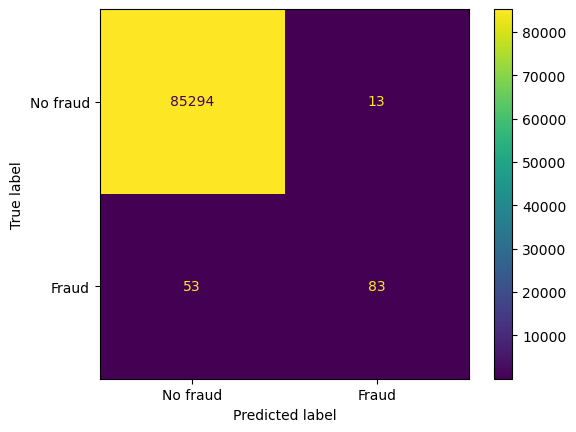

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No fraud','Fraud'])
cmd.plot()
plt.show()

### 3C recall, precision & f1-score
- Maak 4 variabelen aan:
    - TN: Wijs hieraan het aantal 'True Negatives' uit cm toe.
    - TP: Wijs hieraan het aantal 'True Positives' uit cm toe.
    - FN: Wijs hieraan het aantal 'False Negatives' uit cm toe.
    - FP: Wijs hieraan het aantal 'False Positives' uit cm toe.    
- Bereken de precision en recall op basis van deze 4 variabelen.
- Leg in eigen woorden uit wat precision en recall betekenen.

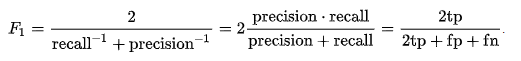

- Bereken en toon de f1-score
- Controleer je antwoorden met het classification report van sklearn

---
- Create 4 variables:
     - TN: Assign to this the number of 'True Negatives' from cm.
     - TP: Assign to this the number of 'True Positives' from cm.
     - FN: Assign to this the number of 'False Negatives' from cm.
     - FP: Assign to this the number of 'False Positives' from cm.
- Calculate the precision and recall based on these 4 variables.
- Explain in your own words what precision and recall mean.

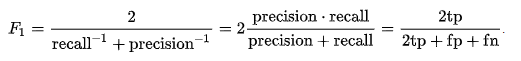

- Calculate and display the f1 score
- Check your answers with sklearn's classification report

In [16]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

precision = TP / (TP + FP) #column of cm
recall = TP / (TP + FN) #row of cm
print(precision, recall)

f1 = 2*precision*recall/(precision + recall)

print(f1)

print(classification_report(y_test, y_pred))

# precision: how many of the fraud predictions are actual fraud.
# recall: how many of the actual fraud cases has the model found.

0.8645833333333334 0.6102941176470589
0.7155172413793103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.61      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



### 3D Opportunities
- Gebruik het eerder gedefinieerde logistic regression model om kansen ('probabilities') te berekenen per klasse op basis van de testdata.
- Toon de eerste 5 rijen van deze kansen.

---
- Use the previously defined logistic regression model to calculate probabilities per class based on the test data.
- Show the first 5 rows of these odds.

In [17]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[:5])

#The first column will contains the probabilities for the first class, 
#and the second column will contains the probabilities for the second class.

[9.99999579e-01 1.06787588e-04 4.09508898e-04 4.81546352e-05
 1.24975851e-05]


### 3E True Positive Rate & False Positive Rate
- Maak 2 variabelen aan:
    - TPR: True Positive Rate
    - FPR: False Positive Rate
- Toon en bereken deze op basis van de confusion matrix en je eerdere gedefinieerde variabelen (TN, TP, FN, FP).

---
- Create 2 variables:
     - TPR: True Positive Rate
     - FPR: False Positive Rate
- Show and calculate it based on the confusion matrix and your previously defined variables (TN, TP, FN, FP).

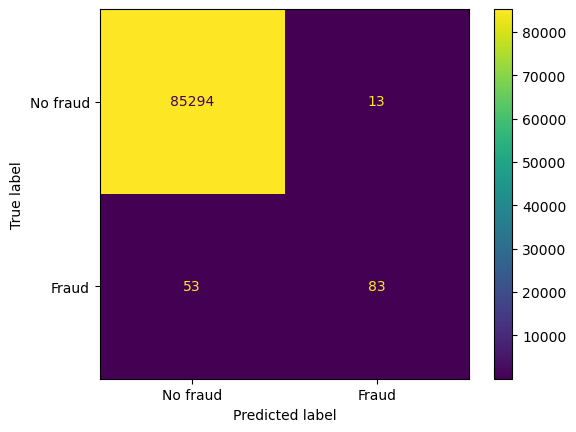

0.61 0.0


In [19]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['No fraud','Fraud'])
cmd.plot()
plt.show()
TPR = TP / (TP + FN) #=recall = second line of cm
FPR = FP / (FP + TN ) # = first line of cm

print(round(TPR, 2), round(FPR, 2))

#True Positive Rate (TPR) is also known as Sensitivity or Recall

### 3F ROC
- Toon de ROC Curve
- Leg uit wat deze grafiek laat zien

---
- Show the ROC Curve (Receiver Operating Characteristic)

ROC, is a graphical representation of the performance of a binary classifier system as the discrimination threshold is varied.
- Explain what this graph shows

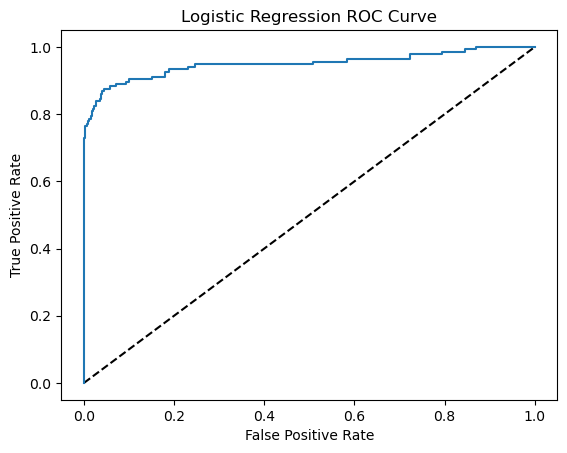

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# With threshold at p = 0.5 then TPR is 0.6 and FPR is almost 0. 
# As soon as we move the threshold, the FPR increases sharply.

# The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) 
# at various threshold settings. The closer the curve is to the top-left corner of the plot, 
# the better the classifier. An ROC curve that is close to the top-left corner of the plot 
# has a high TPR and a low FPR, indicating that it correctly identifies a large proportion 
# of positive instances while correctly rejecting a large proportion of negative instances. 
# A perfect classifier would have an ROC curve that hugs the top-left corner, meaning that 
# it has a TPR of 1 and an FPR of 0.

### 3G AUC
- Toon de Area Under the Curve.
- Waarvoor is dit een nuttige metric?

---
- Show the Area Under the Curve.

The AUC is a summary of the ROC curve, representing the overall performance of the classifier. The AUC is the area under the ROC curve, which ranges between 0.5 and 1, with 1 being a perfect classifier and 0.5 being a random classifier.
- Why is this a useful metric?

The AUC is a useful metric because it provides a single number summary of the classifier's performance. The AUC summarizes the ROC curve, taking into account all possible thresholds, making it a more robust metric for comparing different classifiers or for comparing the performance of the same classifier with different hyperparameter settings. The AUC is particularly useful when the class distribution is imbalanced, meaning that the number of positive instances is much smaller than the number of negative instances, or vice versa.

In [22]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# compare models

0.948982102013558


### 3H beste metric
- Welke van bovengenoemde metrics is / zijn het meest geschikt voor het beoordelen van machine learning voor deze dataset? Waarom?

---
- Which of the above metrics is/are best suited for assessing machine learning for this dataset? Why?

### Antwoord 3H:
- The best metrics to assess machine learning for this dataset would depend on the problem and the goals of the analysis.

**recall and precision**

For binary classification problems, both precision, recall and the F1 score are commonly used metrics that provide a balance between the number of true positive (TP) predictions and the number of false positive (FP) predictions. The F1 score combines precision and recall into a single metric, and is particularly useful when the class distribution is imbalanced.

The ROC curve and the AUC provide a comprehensive view of the classifier's performance by showing how the true positive rate (TPR) changes with different classification thresholds. The AUC summarizes the ROC curve and provides a single number that summarizes the classifier's overall performance, making it a useful metric for comparing different classifiers or for comparing the performance of the same classifier with different hyperparameter settings.

In conclusion, if the goal is to identify all instances of the positive class, regardless of the number of false positives, recall would be the best metric. If the goal is to minimize the number of false positives, precision would be the best metric. If the goal is to balance both recall and precision, the F1 score would be the best metric. If the goal is to have a comprehensive understanding of the classifier's performance, the ROC curve and the AUC would be the best metrics.

## 4 Parameter tuning
- Pas twee methoden van hyperparameter tuning toe op dit model.
- Een mogelijke parameter for logistic regression is 'C'. Onderzoek wat deze parameter doet.
- Bij welke C geeft het model de beste resultaten op de metric van 3H?

---
- Apply two methods of hyperparameter tuning to this model.
- A possible parameter for logistic regression is 'C'. Investigate what this parameter does.
- At which C does the model give the best results on the metric of 3H?

In [25]:
from sklearn.model_selection import GridSearchCV, KFold
logreg = LogisticRegression(max_iter = 1000)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"C": [0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(max_iter = 2000)

In [26]:
logreg_cv = GridSearchCV(logreg, param_grid, cv = kf, scoring = 'f1')
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [27]:
print(logreg_cv.best_params_, logreg_cv.best_score_)

{'C': 0.1} 0.7128211148348381


In [28]:
from sklearn.model_selection import RandomizedSearchCV
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv = kf, scoring = 'f1', n_iter = 2)
logreg_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LogisticRegression(max_iter=2000), n_iter=2,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100]},
                   scoring='f1')

In [29]:
print(logreg_cv.best_params_, logreg_cv.best_score_)

{'C': 0.1} 0.7128211148348381


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import random

import warnings
warnings.filterwarnings("ignore")

kf = KFold(n_splits=2, shuffle=True, random_state=42)
# Define the parameter distribution to sample from
param_dist = {'C': [0.01, 0.1, 10, 100]}

# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='lbfgs', n_jobs = -1)

# Use RandomizedSearchCV to perform the hyperparameter tuning
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist,
                                   cv=kf, random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)


/Users/ardit/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ardit/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Best hyperparameters:  {'C': 10}
